In [1]:
import pandas as pd

In [2]:
house=pd.read_csv("Real estate.csv")

In [3]:
house.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
house.describe()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
%matplotlib inline

array([[<Axes: title={'center': 'No'}>,
        <Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>],
       [<Axes: title={'center': 'X3 distance to the nearest MRT station'}>,
        <Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>],
       [<Axes: title={'center': 'X6 longitude'}>,
        <Axes: title={'center': 'Y house price of unit area'}>, <Axes: >]],
      dtype=object)

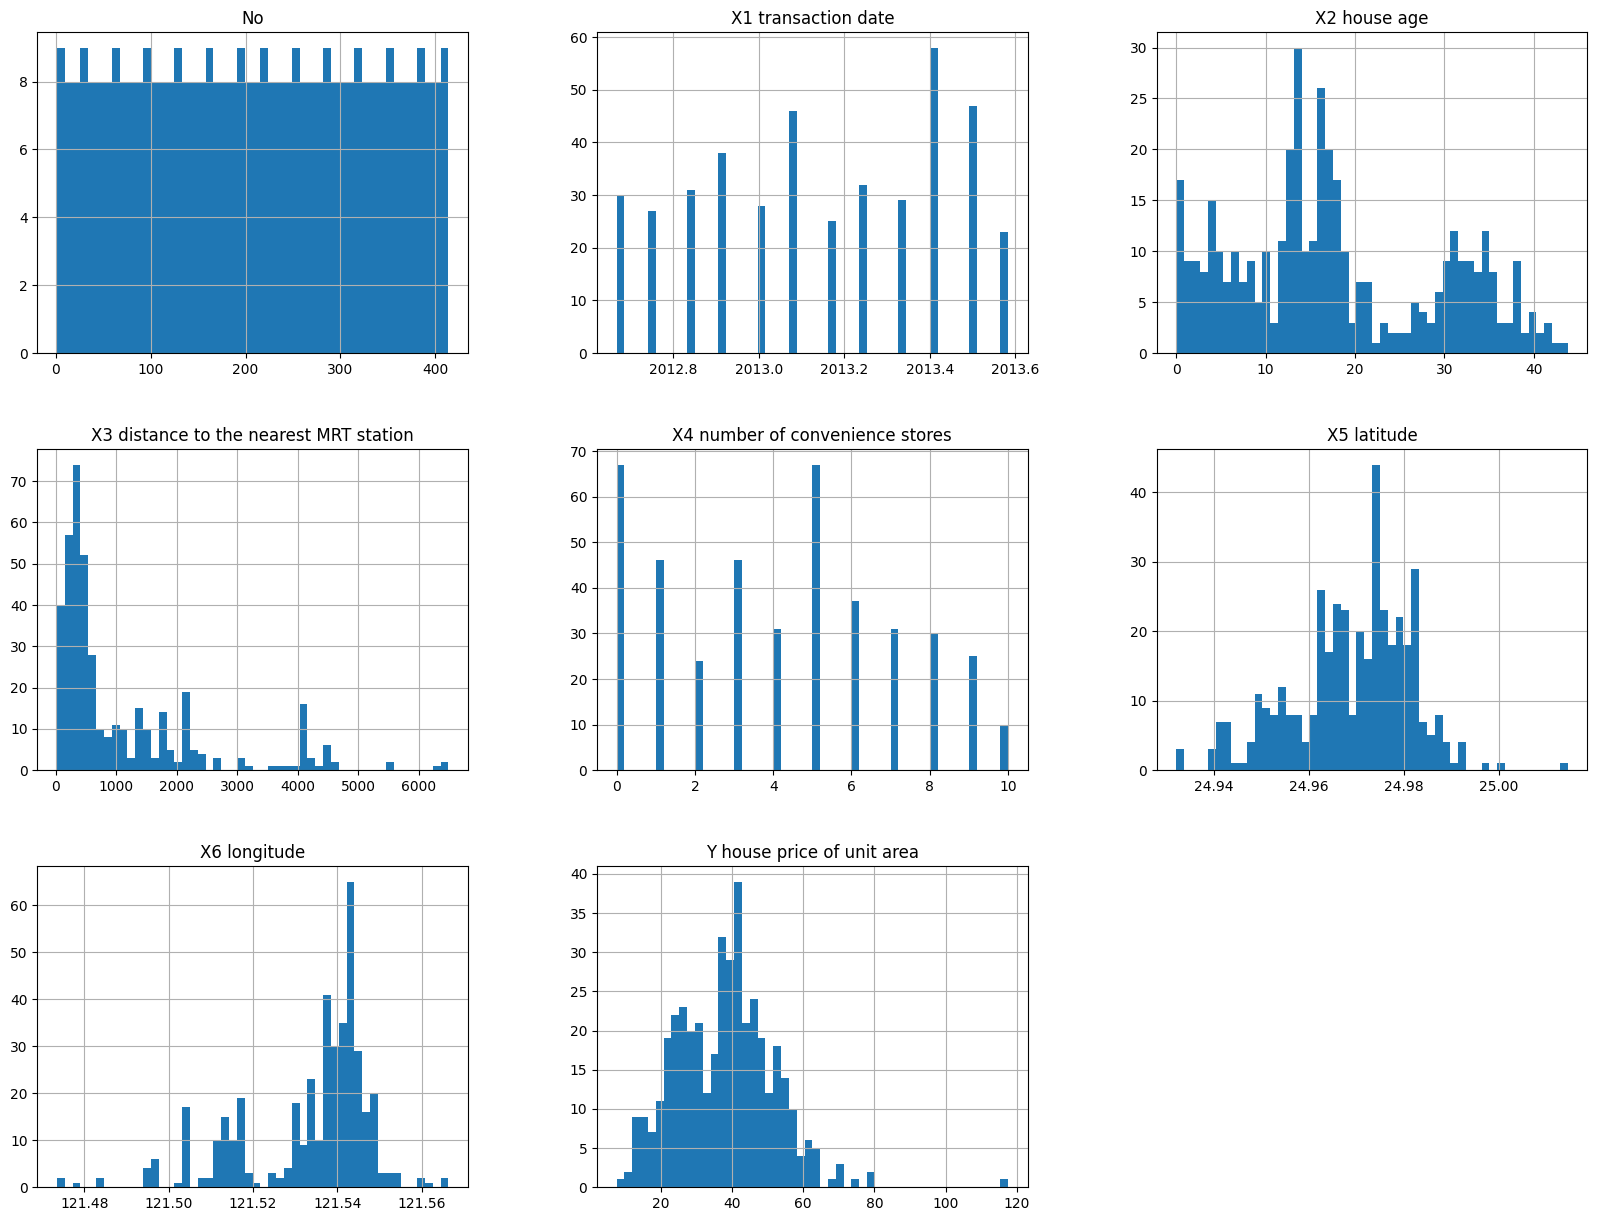

In [7]:
import matplotlib.pyplot as plt
house.hist(bins=50, figsize=(20,15))

In [8]:
from sklearn.model_selection import train_test_split
trainset,testset=train_test_split(house,test_size=0.2,random_state=42)
print("Rows in train set:",len(trainset))
print("Rows in test set:",len(testset))

Rows in train set: 331
Rows in test set: 83


In [9]:
#Looking For Correlations
corrmatrix=house.corr()

In [10]:
corrmatrix["Y house price of unit area"].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

In [11]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='Y house price of unit area', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X5 latitude', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X6 longitude', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X5 latitude', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X6 longitude', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X2 house age', ylabel='X4 number of convenience stores'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X5 latitude'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X5 latitu

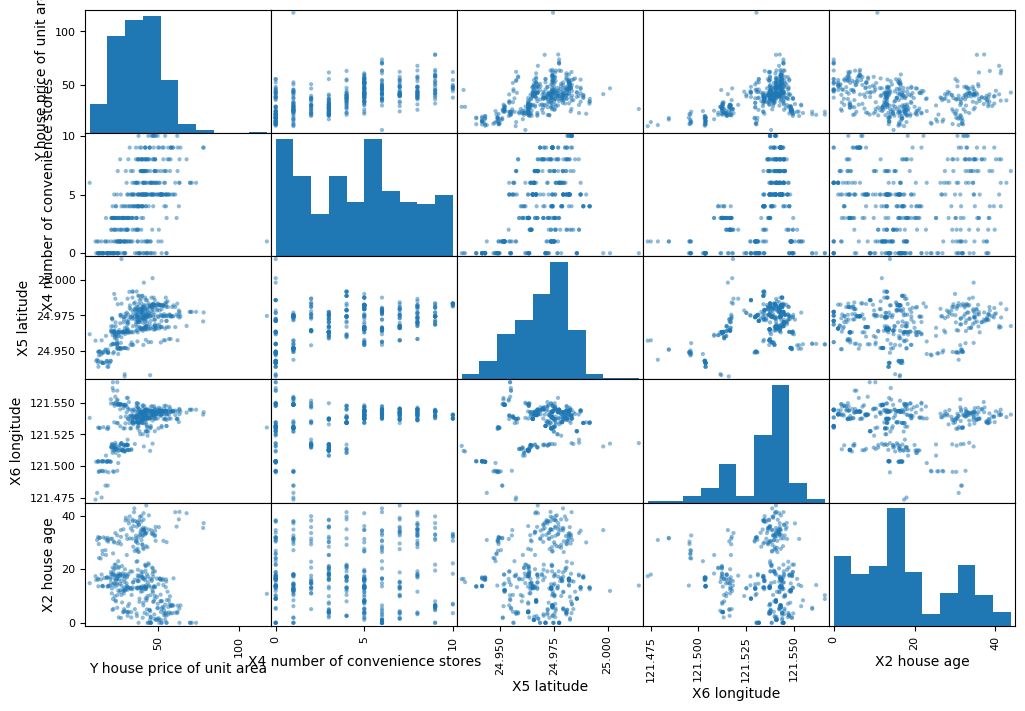

In [12]:
attributes=["Y house price of unit area","X4 number of convenience stores","X5 latitude","X6 longitude","X2 house age"]
scatter_matrix(house[attributes],figsize=(12,8))

<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

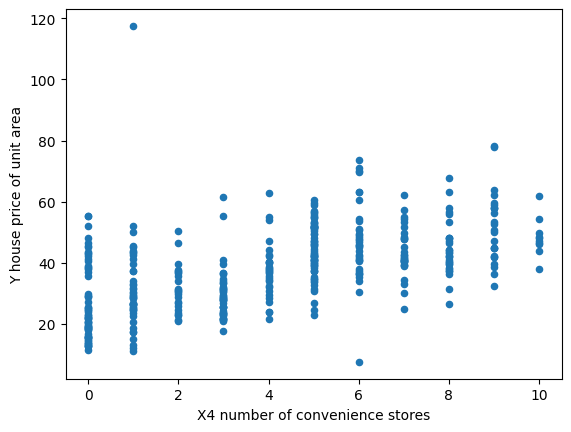

In [13]:
house.plot(kind="scatter",x="X4 number of convenience stores",y="Y house price of unit area")

In [14]:
house=trainset.drop("Y house price of unit area",axis=1)
houselabels=trainset["Y house price of unit area"].copy()

In [15]:
# Creating a Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
mypipeline=Pipeline([('std_scaler',StandardScaler()),])

In [16]:
housenum=mypipeline.fit_transform(house)

In [17]:
housenum

array([[-1.58079708e-01,  1.12832111e-03,  2.34401494e+00, ...,
         9.68041591e-01, -1.47065968e-01,  4.55057247e-01],
       [ 2.00248043e-01,  2.96350853e-01, -8.21281376e-01, ...,
        -4.91703665e-02, -7.43116969e-01, -1.35592638e+00],
       [-1.75349136e+00, -1.77732066e+00, -9.00855865e-01, ...,
        -3.88241019e-01, -5.04054791e-01, -1.42748297e+00],
       ...,
       [ 5.07386116e-01,  5.91573384e-01, -5.73716301e-01, ...,
        -1.06638232e+00,  4.22511704e-01, -2.29077262e-01],
       [ 1.17285194e+00, -1.18687560e+00, -1.12189611e+00, ...,
         6.28970939e-01,  5.22789463e-01,  7.53989921e-01],
       [-9.25924889e-01, -2.97651108e-01, -1.43135245e+00, ...,
         6.28970939e-01, -2.90663719e-01,  4.68432311e-01]])

In [18]:
#Selecting a desired Model for Real Estates Prediction
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housenum,houselabels)

RandomForestRegressor()

In [19]:
somedata=house.iloc[:5]


In [20]:
somelabels=houselabels.iloc[:5]

In [21]:
prepdata=mypipeline.transform(somedata)

In [22]:
model.predict(prepdata)

array([48.442, 24.429, 30.642, 38.015, 42.362])

In [23]:
list(somelabels)

[42.7, 23.9, 32.1, 38.3, 40.8]

In [24]:
#Evaluating the Model

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np
housepredictions=model.predict(housenum)
mse=mean_squared_error(houselabels,housepredictions)
rmse=np.sqrt(mse)

In [26]:
rmse

3.156968013660405

In [27]:
#using better evaluation technique - cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,housenum,houselabels,scoring="neg_mean_squared_error",cv=10)
rmsescores=np.sqrt(-score)

In [28]:
rmsescores

array([ 7.93362639,  5.64329652,  8.59394856,  9.62295088,  5.80714303,
        8.51680998,  6.56521105,  6.29459321,  6.96402122, 13.85691186])

In [29]:
def printscore(score):
    print("Scores:",score)
    print("Mean:",score.mean())
    print("Standard deviation:",score.std())

In [30]:
printscore(rmsescores)

Scores: [ 7.93362639  5.64329652  8.59394856  9.62295088  5.80714303  8.51680998
  6.56521105  6.29459321  6.96402122 13.85691186]
Mean: 7.979851271489869
Standard deviation: 2.3229411511433273


In [31]:
from joblib  import dump,load
dump(model,'Real_Estate_Price_Prediction.joblib')

['Real_Estate_Price_Prediction.joblib']

In [32]:
# Test the model on test data
xtest=testset.drop("Y house price of unit area",axis=1)
ytest=testset["Y house price of unit area"].copy()
xtestprep=mypipeline.transform(xtest)
finpredict=model.predict(xtestprep)
finmse=mean_squared_error(ytest,finpredict)
finrmse=np.sqrt(finmse)
print(finpredict, list(ytest))

[47.013 39.128 54.957 37.095 26.252 47.899 48.952 51.899 15.112 59.634
 24.592 31.263 35.201 15.323 36.612 25.553 39.146 52.144 25.33  38.611
 14.756 23.397 47.353 46.733 14.945 38.24  16.414 56.058 50.189 38.235
 19.852 25.313 36.048 25.737 48.394 37.534 53.331 17.447 47.374 52.593
 50.656 40.511 48.301 39.413 39.959 50.369 35.305 23.76  47.509 45.464
 48.002 52.875 41.151 38.615 39.417 15.306 37.656 25.496 25.112 52.446
 28.104 23.205 15.363 14.573 19.883 24.253 25.786 41.342 35.552 27.455
 41.002 50.07  54.758 50.675 35.295 36.285 40.205 40.039 41.426 31.909
 38.002 48.296 27.217] [45.1, 42.3, 52.2, 37.3, 22.8, 36.3, 53.0, 51.4, 16.1, 59.0, 30.6, 30.7, 35.6, 13.7, 62.9, 30.5, 41.9, 54.4, 29.5, 43.7, 12.2, 22.1, 49.5, 47.4, 18.6, 28.5, 14.7, 45.4, 41.0, 35.1, 22.1, 28.9, 30.5, 26.5, 49.3, 37.0, 56.3, 15.4, 48.5, 63.3, 50.5, 42.2, 37.9, 37.5, 40.5, 57.4, 26.5, 21.8, 49.7, 47.1, 49.0, 60.7, 33.1, 41.0, 36.5, 20.0, 34.7, 30.6, 25.6, 46.2, 27.7, 27.0, 15.6, 15.5, 11.2, 23.7, 24.6, 42.0, 

In [33]:
finrmse

5.734836976286099

In [34]:
prepdata[0]

array([-1.58079708e-01,  1.12832111e-03,  2.34401494e+00, -8.23965189e-01,
        9.68041591e-01, -1.47065968e-01,  4.55057247e-01])

In [35]:
# Using the model
from joblib  import dump,load
import numpy as np
model=load('Real_Estate_Price_Prediction.joblib')
input=np.array([[-1.58079708e-01,  1.12832111e-03,  2.34401494e+00, -8.23965189e-01,
        9.68041591e-01, -1.47065968e-01,  4.55057247e-01]])
model.predict(input)

array([48.442])